# LDA主题模型实践

## 读取数据和数据预处理

In [1]:
import pandas as pd
from pprint import pprint

train_csv = pd.read_csv("./data/train_clean.csv", header=0, sep='\t')
train_csv

,text,label,category_id
0,杏林 芳菲 广东 中医药 曹磊 编著 的 杏林 芳菲 广东 中医药 注重 文化 内涵 的 挖...,文化,6
1,额吉 的 白云 优秀 蒙古文 文学作品 翻译 出版 工程 第五辑 散文 卷 散文集 额吉 的...,文学,0
2,"叶赛宁 抒情诗 选 本书 收入 叶赛宁 的 206 首 抒情诗 , 多为 名篇 佳作 叶赛宁...",文学,0
3,"待 我 长发 及 腰 . 娶 我 可好 走过 唐诗 , 路过 宋词 , 相约 在 江南 的 ...",文学,0
4,"公司债务 融资 及其 相关 金融 系统 本书 结合 经济 生活 热点 和 前沿 问题 , 对...",管理,1
...,...,...,...
206311,四个 全面 学习 读本 首次 权威 定义 : 五论 协调 推进 四个 全面 评论员 文章 首...,政治/军事,2
206312,湖北省 湖泊 志 : 下册 全 本书 收录 了 湖北省 的 中型 湖泊 、 小型 湖泊 和 ...,科学与自然,12
206313,2019 年 计算机专业 基础 综合 考试 真题 思路 分析 本书 是 计算机专业 研究生 ...,考试,14
206314,"野生 作家 访谈录 : 我们 在 写作 现场 本书 所 收录 的 文章 , 是 界面 文化频...",文学,0


In [2]:
train_csv["label"].value_counts()

文学         47993
大中专教材教辅    21847
童书         20969
工业技术       10906
中小学教辅       9065
艺术          8462
社会科学        7322
小说          7042
计算机与互联网     6385
建筑          6369
管理          5900
外语学习        5201
历史          4832
科学与自然       4786
法律          4141
政治/军事       4070
哲学/宗教       3558
医学          3168
励志与成功       3151
考试          2837
青春文学        2747
文化          2507
农业/林业       2349
动漫          1641
健身与保健       1381
育儿/家教       1288
烹饪/美食       1209
国学/古籍       1099
旅游/地图       1092
科普读物        1068
孕产/胎教        964
金融与投资        754
婚恋与两性        213
Name: label, dtype: int64

## 加载停用词

In [3]:
stop_words = [w.strip() for w in open("./data/stopwords.txt", "r").readlines()]
pprint(stop_words)

['———',
 '》），',
 '）÷（１－',
 '”，',
 '）、',
 '＝（',
 ':',
 '→',
 '℃',
 '&',
 '*',
 '一一',
 '~~~~',
 '’',
 '.',
 '『',
 '.一',
 './',
 '--',
 '』',
 '＝″',
 '【',
 '［＊］',
 '｝＞',
 '［⑤］］',
 '［①Ｄ］',
 'ｃ］',
 'ｎｇ昉',
 '＊',
 '//',
 '［',
 '］',
 '［②ｅ］',
 '［②ｇ］',
 '＝｛',
 '}',
 '，也',
 '‘',
 'Ａ',
 '［①⑥］',
 '［②Ｂ］',
 '［①ａ］',
 '［④ａ］',
 '［①③］',
 '［③ｈ］',
 '③］',
 '１．',
 '－－',
 '［②ｂ］',
 '’‘',
 '×××',
 '［①⑧］',
 '０：２',
 '＝［',
 '［⑤ｂ］',
 '［②ｃ］',
 '［④ｂ］',
 '［②③］',
 '［③ａ］',
 '［④ｃ］',
 '［①⑤］',
 '［①⑦］',
 '［①ｇ］',
 '∈［',
 '［①⑨］',
 '［①④］',
 '［①ｃ］',
 '［②ｆ］',
 '［②⑧］',
 '［②①］',
 '［①Ｃ］',
 '［③ｃ］',
 '［③ｇ］',
 '［②⑤］',
 '［②②］',
 '一.',
 '［①ｈ］',
 '.数',
 '［］',
 '［①Ｂ］',
 '数/',
 '［①ｉ］',
 '［③ｅ］',
 '［①①］',
 '［④ｄ］',
 '［④ｅ］',
 '［③ｂ］',
 '［⑤ａ］',
 '［①Ａ］',
 '［②⑧］',
 '［②⑦］',
 '［①ｄ］',
 '［②ｊ］',
 '〕〔',
 '］［',
 '://',
 '′∈',
 '［②④',
 '［⑤ｅ］',
 '１２％',
 'ｂ］',
 '...',
 '...................',
 '…………………………………………………③',
 'ＺＸＦＩＴＬ',
 '［③Ｆ］',
 '」',
 '［①ｏ］',
 '］∧′＝［',
 '∪φ∈',
 '′｜',
 '｛－',
 '②ｃ',
 '｝',
 '［③①］',
 'Ｒ．Ｌ．',
 '［①Ｅ］',
 'Ψ',
 '－［＊］－',
 '↑',
 '.日',
 '［②ｄ］',

## 使用结巴分词

In [4]:
import jieba
train_csv['text1'] = train_csv['text'].apply(lambda x: "".join([w for w in x.split(" ")]))
train_csv['words'] = train_csv['text'].apply(lambda x: [w for w in x.split(" ") if w not in stop_words])
train_csv['words1'] = train_csv['text1'].apply(lambda x: [w for w in jieba.cut(x) if w not in stop_words])
train_csv

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/1t/r3byrg0s5cb80qkz17dn8nc40000gn/T/jieba.cache
Loading model cost 0.805 seconds.
Prefix dict has been built successfully.


,text,label,category_id,text1,words,words1
0,杏林 芳菲 广东 中医药 曹磊 编著 的 杏林 芳菲 广东 中医药 注重 文化 内涵 的 挖...,文化,6,"杏林芳菲广东中医药曹磊编著的杏林芳菲广东中医药注重文化内涵的挖掘以及特殊技艺的介绍,对于非物...","[杏林, 芳菲, 广东, 中医药, 曹磊, 编著, 杏林, 芳菲, 广东, 中医药, 注重,...","[杏林, 芳菲, 广东, 中医药, 曹磊, 编著, 杏林, 芳菲, 广东, 中医药, 注重,..."
1,额吉 的 白云 优秀 蒙古文 文学作品 翻译 出版 工程 第五辑 散文 卷 散文集 额吉 的...,文学,0,额吉的白云优秀蒙古文文学作品翻译出版工程第五辑散文卷散文集额吉的白云共收入16篇蒙译汉散文作...,"[额吉, 白云, 优秀, 蒙古文, 文学作品, 翻译, 出版, 工程, 第五辑, 散文, 卷...","[额吉, 白云, 优秀, 蒙古文, 文学作品, 翻译, 出版, 工程, 第五辑, 散文, 卷..."
2,"叶赛宁 抒情诗 选 本书 收入 叶赛宁 的 206 首 抒情诗 , 多为 名篇 佳作 叶赛宁...",文学,0,"叶赛宁抒情诗选本书收入叶赛宁的206首抒情诗,多为名篇佳作叶赛宁的诗从上世纪80年代起在我国...","[叶赛宁, 抒情诗, 选, 收入, 叶赛宁, 206, 首, 抒情诗, 多为, 名篇, 佳作...","[叶赛宁, 抒情诗, 选, 收入, 叶赛宁, 206, 首, 抒情诗, 多为, 名篇, 佳作..."
3,"待 我 长发 及 腰 . 娶 我 可好 走过 唐诗 , 路过 宋词 , 相约 在 江南 的 ...",文学,0,"待我长发及腰.娶我可好走过唐诗,路过宋词,相约在江南的美文佳景我的长发,你的臂弯,寂静淡然,...","[长发, 腰, 娶, 可好, 走过, 唐诗, 路过, 宋词, 相约, 江南, 美文, 佳景,...","[长发, 腰, 娶, 可好, 走过, 唐诗, 路过, 宋词, 相约, 江南, 美文, 佳景,..."
4,"公司债务 融资 及其 相关 金融 系统 本书 结合 经济 生活 热点 和 前沿 问题 , 对...",管理,1,"公司债务融资及其相关金融系统本书结合经济生活热点和前沿问题,对公司债务融资进行了多方面研究,...","[公司债务, 融资, 相关, 金融, 系统, 结合, 经济, 生活, 热点, 前沿, 问题,...","[公司债务, 融资, 相关, 金融, 系统, 结合, 经济, 生活, 热点, 前沿, 问题,..."
...,...,...,...,...,...,...
206311,四个 全面 学习 读本 首次 权威 定义 : 五论 协调 推进 四个 全面 评论员 文章 首...,政治/军事,2,四个全面学习读本首次权威定义:五论协调推进四个全面评论员文章首次系统梳理:习近平总书记关于每...,"[四个, 全面, 学习, 读本, 首次, 权威, 定义, 五论, 协调, 推进, 四个, 全...","[四个, 全面, 学习, 读本, 首次, 权威, 定义, 五论, 协调, 推进, 四个, 全..."
206312,湖北省 湖泊 志 : 下册 全 本书 收录 了 湖北省 的 中型 湖泊 、 小型 湖泊 和 ...,科学与自然,12,"湖北省湖泊志:下册全本书收录了湖北省的中型湖泊、小型湖泊和人工湖,如:芦柴湖、余家湖、青草湖...","[湖北省, 湖泊, 志, 下册, 全, 收录, 湖北省, 中型, 湖泊, 小型, 湖泊, 人...","[湖北省, 湖泊, 志, 下册, 全, 收录, 湖北省, 中型, 湖泊, 小型, 湖泊, 人..."
206313,2019 年 计算机专业 基础 综合 考试 真题 思路 分析 本书 是 计算机专业 研究生 ...,考试,14,"2019年计算机专业基础综合考试真题思路分析本书是计算机专业研究生入学考试真题分析用书,首先...","[2019, 年, 计算机专业, 基础, 综合, 考试, 真题, 思路, 分析, 计算机专业...","[2019, 年, 计算机专业, 基础, 综合, 考试, 真题, 思路, 分析, 计算机专业..."
206314,"野生 作家 访谈录 : 我们 在 写作 现场 本书 所 收录 的 文章 , 是 界面 文化频...",文学,0,"野生作家访谈录:我们在写作现场本书所收录的文章,是界面文化频道记者对靠前野生作家的特稿报道接...","[野生, 作家, 访谈录, 写作, 现场, 收录, 文章, 界面, 文化频道, 记者, 前,...","[野生, 作家, 访谈录, 写作, 现场, 收录, 文章, 界面, 文化频道, 记者, 前,..."


In [5]:
train_csv["seq_len"] = train_csv["words"].apply(lambda x: len(x))
train_csv

,text,label,category_id,text1,words,words1,seq_len
0,杏林 芳菲 广东 中医药 曹磊 编著 的 杏林 芳菲 广东 中医药 注重 文化 内涵 的 挖...,文化,6,"杏林芳菲广东中医药曹磊编著的杏林芳菲广东中医药注重文化内涵的挖掘以及特殊技艺的介绍,对于非物...","[杏林, 芳菲, 广东, 中医药, 曹磊, 编著, 杏林, 芳菲, 广东, 中医药, 注重,...","[杏林, 芳菲, 广东, 中医药, 曹磊, 编著, 杏林, 芳菲, 广东, 中医药, 注重,...",50
1,额吉 的 白云 优秀 蒙古文 文学作品 翻译 出版 工程 第五辑 散文 卷 散文集 额吉 的...,文学,0,额吉的白云优秀蒙古文文学作品翻译出版工程第五辑散文卷散文集额吉的白云共收入16篇蒙译汉散文作...,"[额吉, 白云, 优秀, 蒙古文, 文学作品, 翻译, 出版, 工程, 第五辑, 散文, 卷...","[额吉, 白云, 优秀, 蒙古文, 文学作品, 翻译, 出版, 工程, 第五辑, 散文, 卷...",63
2,"叶赛宁 抒情诗 选 本书 收入 叶赛宁 的 206 首 抒情诗 , 多为 名篇 佳作 叶赛宁...",文学,0,"叶赛宁抒情诗选本书收入叶赛宁的206首抒情诗,多为名篇佳作叶赛宁的诗从上世纪80年代起在我国...","[叶赛宁, 抒情诗, 选, 收入, 叶赛宁, 206, 首, 抒情诗, 多为, 名篇, 佳作...","[叶赛宁, 抒情诗, 选, 收入, 叶赛宁, 206, 首, 抒情诗, 多为, 名篇, 佳作...",67
3,"待 我 长发 及 腰 . 娶 我 可好 走过 唐诗 , 路过 宋词 , 相约 在 江南 的 ...",文学,0,"待我长发及腰.娶我可好走过唐诗,路过宋词,相约在江南的美文佳景我的长发,你的臂弯,寂静淡然,...","[长发, 腰, 娶, 可好, 走过, 唐诗, 路过, 宋词, 相约, 江南, 美文, 佳景,...","[长发, 腰, 娶, 可好, 走过, 唐诗, 路过, 宋词, 相约, 江南, 美文, 佳景,...",50
4,"公司债务 融资 及其 相关 金融 系统 本书 结合 经济 生活 热点 和 前沿 问题 , 对...",管理,1,"公司债务融资及其相关金融系统本书结合经济生活热点和前沿问题,对公司债务融资进行了多方面研究,...","[公司债务, 融资, 相关, 金融, 系统, 结合, 经济, 生活, 热点, 前沿, 问题,...","[公司债务, 融资, 相关, 金融, 系统, 结合, 经济, 生活, 热点, 前沿, 问题,...",33
...,...,...,...,...,...,...,...
206311,四个 全面 学习 读本 首次 权威 定义 : 五论 协调 推进 四个 全面 评论员 文章 首...,政治/军事,2,四个全面学习读本首次权威定义:五论协调推进四个全面评论员文章首次系统梳理:习近平总书记关于每...,"[四个, 全面, 学习, 读本, 首次, 权威, 定义, 五论, 协调, 推进, 四个, 全...","[四个, 全面, 学习, 读本, 首次, 权威, 定义, 五论, 协调, 推进, 四个, 全...",33
206312,湖北省 湖泊 志 : 下册 全 本书 收录 了 湖北省 的 中型 湖泊 、 小型 湖泊 和 ...,科学与自然,12,"湖北省湖泊志:下册全本书收录了湖北省的中型湖泊、小型湖泊和人工湖,如:芦柴湖、余家湖、青草湖...","[湖北省, 湖泊, 志, 下册, 全, 收录, 湖北省, 中型, 湖泊, 小型, 湖泊, 人...","[湖北省, 湖泊, 志, 下册, 全, 收录, 湖北省, 中型, 湖泊, 小型, 湖泊, 人...",37
206313,2019 年 计算机专业 基础 综合 考试 真题 思路 分析 本书 是 计算机专业 研究生 ...,考试,14,"2019年计算机专业基础综合考试真题思路分析本书是计算机专业研究生入学考试真题分析用书,首先...","[2019, 年, 计算机专业, 基础, 综合, 考试, 真题, 思路, 分析, 计算机专业...","[2019, 年, 计算机专业, 基础, 综合, 考试, 真题, 思路, 分析, 计算机专业...",84
206314,"野生 作家 访谈录 : 我们 在 写作 现场 本书 所 收录 的 文章 , 是 界面 文化频...",文学,0,"野生作家访谈录:我们在写作现场本书所收录的文章,是界面文化频道记者对靠前野生作家的特稿报道接...","[野生, 作家, 访谈录, 写作, 现场, 收录, 文章, 界面, 文化频道, 记者, 前,...","[野生, 作家, 访谈录, 写作, 现场, 收录, 文章, 界面, 文化频道, 记者, 前,...",61


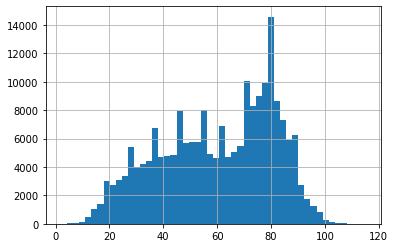

In [6]:
train_csv["seq_len"].hist(bins=50)

## 生成语料

In [9]:
texts = train_csv['words'].values.tolist()
corpus = [" ".join(text) for text in texts]
print("text: ", texts[0])
print("corpus: ", corpus[0])

text:  ['杏林', '芳菲', '广东', '中医药', '曹磊', '编著', '杏林', '芳菲', '广东', '中医药', '注重', '文化', '内涵', '挖掘', '特殊', '技艺', '介绍', '非', '物质', '文化遗产', '广东', '中医药', '内涵', '技艺', '形态', '历史', '演变', '艺术', '价值', '给予', '全面', '介绍', '深刻', '直观', '记录', '时代', '变迁', '记录', '民间', '丰富', '生活', '图文并茂', '生动活泼', '富有', '艺术', '表现力', '读者', '文化', '审美', '感受']
corpus:  杏林 芳菲 广东 中医药 曹磊 编著 杏林 芳菲 广东 中医药 注重 文化 内涵 挖掘 特殊 技艺 介绍 非 物质 文化遗产 广东 中医药 内涵 技艺 形态 历史 演变 艺术 价值 给予 全面 介绍 深刻 直观 记录 时代 变迁 记录 民间 丰富 生活 图文并茂 生动活泼 富有 艺术 表现力 读者 文化 审美 感受


## 利用Dictionary生成字典

In [19]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(texts)

In [20]:
len(dictionary), len(texts[0])

(313760, 50)

In [21]:
len(dictionary.token2id), dictionary.token2id

(313760,
 {'中医药': 0,
  '丰富': 1,
  '介绍': 2,
  '价值': 3,
  '全面': 4,
  '内涵': 5,
  '历史': 6,
  '变迁': 7,
  '图文并茂': 8,
  '审美': 9,
  '富有': 10,
  '广东': 11,
  '形态': 12,
  '感受': 13,
  '技艺': 14,
  '挖掘': 15,
  '文化': 16,
  '文化遗产': 17,
  '时代': 18,
  '曹磊': 19,
  '杏林': 20,
  '民间': 21,
  '注重': 22,
  '深刻': 23,
  '演变': 24,
  '物质': 25,
  '特殊': 26,
  '生动活泼': 27,
  '生活': 28,
  '直观': 29,
  '给予': 30,
  '编著': 31,
  '艺术': 32,
  '芳菲': 33,
  '表现力': 34,
  '记录': 35,
  '读者': 36,
  '非': 37,
  '16': 38,
  '三代': 39,
  '三十年': 40,
  '之情': 41,
  '亲人': 42,
  '代表': 43,
  '优秀': 44,
  '作品': 45,
  '作者': 46,
  '共': 47,
  '内蒙古': 48,
  '出版': 49,
  '创作': 50,
  '卷': 51,
  '发生': 52,
  '变化': 53,
  '工程': 54,
  '建国以来': 55,
  '忧患': 56,
  '思念': 57,
  '成就': 58,
  '抒发': 59,
  '收入': 60,
  '故乡': 61,
  '故土': 62,
  '散文': 63,
  '散文集': 64,
  '整体实力': 65,
  '文学作品': 66,
  '民族': 67,
  '浪漫情怀': 68,
  '深切': 69,
  '热爱': 70,
  '父辈': 71,
  '特有': 72,
  '现状': 73,
  '生态': 74,
  '白云': 75,
  '社会': 76,
  '第五辑': 77,
  '篇': 78,
  '经济': 79,
  '翻天覆地': 80,
  '翻译': 81,

In [30]:
dictionary.token2id['广东'], dictionary[11]

(11, '广东')

# 主题模型
* 主题模型的输入是BOW
* LdaMulticore是LdaModel的优化版本，可用于多进程训练
* num_topics是可调参数
* get_document_topics输入需要预测的句子（BOW格式），以概率形式返回该句的主题分布

In [31]:
from gensim.models import LdaMulticore

corpus = [dictionary.doc2bow(text) for text in texts]
lda = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=30)

* get_document_topics：

当per_word_topics=False时，输出一个list，list中的每一个元素是一个二元tuple，第一个元素是主题的index，第二个元素是该主题的概率

当per_word_topics=True，输出三元的tuple，每个元素是一个list，第一个与上面讲的一样，第二个和第三个包括了句子中每一个word的主题分布

In [33]:
lda.get_document_topics(dictionary.doc2bow(texts[0]))

[(1, 0.53271973), (12, 0.44895098)]

In [35]:
pprint(lda.get_document_topics(dictionary.doc2bow(texts[0]), per_word_topics=True))

([(1, 0.5327005), (12, 0.44897023)],
 [(0, [1, 12]),
  (1, [12, 1]),
  (2, [1, 12]),
  (3, [12, 1]),
  (4, [1, 12]),
  (5, [12, 1]),
  (6, [12, 1]),
  (7, [12, 1]),
  (8, [1, 12]),
  (9, [12, 1]),
  (10, [1, 12]),
  (11, [1, 12]),
  (12, [1, 12]),
  (13, [12, 1]),
  (14, [12, 1]),
  (15, [12, 1]),
  (16, [12, 1]),
  (17, [12, 1]),
  (18, [12, 1]),
  (19, [1]),
  (20, [1, 12]),
  (21, [12, 1]),
  (22, [1, 12]),
  (23, [12, 1]),
  (24, [12, 1]),
  (25, [12, 1]),
  (26, [12, 1]),
  (27, [1, 12]),
  (28, [1, 12]),
  (29, [1, 12]),
  (30, [12, 1]),
  (31, [1, 12]),
  (32, [12, 1]),
  (33, [1]),
  (34, [1, 12]),
  (35, [1, 12]),
  (36, [1, 12]),
  (37, [12, 1])],
 [(0, [(1, 2.9407766), (12, 0.056402087)]),
  (1, [(1, 0.47262242), (12, 0.5273163)]),
  (2, [(1, 1.785615), (12, 0.21432745)]),
  (3, [(1, 0.38715628), (12, 0.61273026)]),
  (4, [(1, 0.6648683), (12, 0.33507746)]),
  (5, [(1, 0.6386283), (12, 1.3610135)]),
  (6, [(1, 0.19205222), (12, 0.8079265)]),
  (7, [(1, 0.14019994), (12, 0.85

In [39]:
lda.get_term_topics(dictionary.token2id["故事"])

[(20, 0.011202833)]

In [40]:
lda.get_topics().shape

(30, 313760)

* **打印每一个主题的top20的word概率**

In [41]:
for i in range(lda.num_topics):
    print("topic {}:".format(i))
    for id, prob in lda.get_topic_terms(i, 20):
        print(dictionary.id2token[id], prob)

topic 0:
宝宝 0.008330322
中国 0.0051351837
小 0.0049500363
作者 0.0049150456
生活 0.004163984
游戏 0.0034848968
大 0.003335846
文化 0.003266936
知识 0.0031851092
动画 0.0031626292
阅读 0.0031018665
世界 0.0029959674
经典 0.0029658128
儿童 0.0028959669
发展 0.002860757
国际 0.0027511253
书 0.0027192205
读者 0.0027104365
文字 0.0026332892
孩子 0.0025903487
topic 1:
内容 0.007635968
介绍 0.0069708885
摄影 0.0062930826
理论 0.0058411867
色彩 0.0051041865
进行 0.0050831554
读者 0.0048588165
设计 0.0045647193
应用 0.0044747987
讲解 0.0038917828
方法 0.0037014096
包括 0.0036434978
主要 0.0036386305
系统 0.0035971508
技术 0.0035613207
案例 0.0034301232
专业 0.0033221692
学生 0.00331367
基础 0.0032194783
部分 0.0031494638
topic 2:
中国 0.0145275835
研究 0.0114677055
文学 0.009852993
作品 0.009482746
包括 0.008678732
内容 0.006688133
主要 0.0059718653
收录 0.005946602
卷 0.0058253985
部分 0.0053360085
诗歌 0.0048474437
年 0.0042822747
篇 0.0040624095
作者 0.003953196
先生 0.0038698276
分为 0.0038143252
学术 0.0036680407
文章 0.0036574288
人 0.0032206643
文献 0.0031880564
topic 3:
汽车 0.023363385
中国 0.00694

世界 0.0072452077
不 0.0053329607
读者 0.0052561415
故事 0.0039970498
文学名著 0.0028987934
人 0.0028508084
小 0.0027553334
更 0.0027299828
系列 0.002656946
中国 0.0026191568
日本 0.0024278937
经典 0.002420322
内容 0.0020495506
生活 0.0019661114
却 0.0019204505
最 0.0019179474
作品 0.0019164438
后 0.0019103881
里 0.0019004582
会 0.0018863949


In [42]:
with open("result0.txt", 'w') as f:
    for i in range(lda.num_topics):
        f.write("topic {}: \n".format(i))
        for id, prob in lda.get_topic_terms(i, 20):
            f.write("{}\t{}\n".format(dictionary.id2token[id], prob))
        f.write("\n")

In [43]:
lda.print_topic(0, 20)

'0.008*"宝宝" + 0.005*"中国" + 0.005*"小" + 0.005*"作者" + 0.004*"生活" + 0.003*"游戏" + 0.003*"大" + 0.003*"文化" + 0.003*"知识" + 0.003*"动画" + 0.003*"阅读" + 0.003*"世界" + 0.003*"经典" + 0.003*"儿童" + 0.003*"发展" + 0.003*"国际" + 0.003*"书" + 0.003*"读者" + 0.003*"文字" + 0.003*"孩子"'

**问题：**

1. 主题词含有数字
2. 主题词含有单字

In [45]:
stop_words = [w.strip() for w in open("./data/cn_stopwords.txt", "r").readlines()]
train_csv['words'] = train_csv['words'].apply(lambda x: [w for w in x if len(w) > 1 and w not in stop_words])
texts = train_csv['words'].values.tolist()
corpus = [" ".join(text) for text in texts]
texts, corpus
dictionary = Dictionary(texts)
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=10)
for i in range(lda.num_topics):
    print("topic {}:".format(i))
    for id, prob in lda.get_topic_terms(i, 20):
        print(dictionary.id2token[id], prob)

topic 0:
内容 0.012615704
技术 0.01019328
教材 0.01017374
介绍 0.0094720395
应用 0.008469636
管理 0.007182749
基础 0.007116543
专业 0.006842838
方法 0.0065072034
包括 0.006304989
主要 0.006178667
学习 0.005968311
设计 0.005931976
学生 0.005754557
系统 0.0055302405
知识 0.0049884203
分析 0.0049822335
教学 0.0049422043
理论 0.0047928174
工程 0.00475405
topic 1:
中国 0.009862823
内容 0.0052620913
管理 0.0052134944
研究 0.005041506
包括 0.0044046342
作品 0.0043067527
作者 0.003926974
主要 0.0037742972
发展 0.0031893097
进行 0.003070608
先生 0.0030493226
创业 0.0030117985
历史 0.0029129284
介绍 0.0029076724
技术 0.0028736733
部分 0.002814768
创新 0.002524884
文化 0.0024715774
教育 0.0024224324
世界 0.002364393
topic 2:
作品 0.008558058
作者 0.0078074452
散文 0.0077424324
文学 0.0075990665
生活 0.0075681433
中国 0.0058855317
人生 0.005620027
经典 0.0054459856
读者 0.0042949407
作家 0.004046326
故事 0.0038794994
小说 0.0035678283
世界 0.0032731863
阅读 0.003190245
文字 0.0030376485
一种 0.0028663184
收录 0.0028481905
创作 0.002709342
文化 0.002448172
一部 0.0023847797
topic 3:
研究 0.020300398
中国 0.017301705
发展 

In [46]:
len(dictionary)

307699

In [47]:
with open("result1.txt", 'w') as f:
    for i in range(lda.num_topics):
        f.write("topic {}: \n".format(i))
        for id, prob in lda.get_topic_terms(i, 20):
            f.write("{}\t{}\n".format(dictionary.id2token[id], prob))
        f.write("\n")

## 保存lda模型

In [48]:
lda.save("lda.model")

## 预测

In [58]:
sequence = "勇闯 法兰西 此书 的 主人公 罗维孝是 国网 的 一名 退休工人 他 曾 骑车 登上 世界屋脊 , 单 车轮 迹 中国 大陆 31 个省 、 市 、 自治区 , 被誉为 中国 骑行 界 骨灰级 精神 教父 本书 以 文学 的 手法 讲述 主人公 罗维孝 孤身一人 从 全球 第一 只 大熊猫 发现 地 四川 宝兴 邓池 沟 出发 , 历时 115 天 , 穿越 8 个 国家 , 骑行 30000 多里路 的 历险 旅程 及 传奇 故事"
sequence

'勇闯 法兰西 此书 的 主人公 罗维孝是 国网 的 一名 退休工人 他 曾 骑车 登上 世界屋脊 , 单 车轮 迹 中国 大陆 31 个省 、 市 、 自治区 , 被誉为 中国 骑行 界 骨灰级 精神 教父 本书 以 文学 的 手法 讲述 主人公 罗维孝 孤身一人 从 全球 第一 只 大熊猫 发现 地 四川 宝兴 邓池 沟 出发 , 历时 115 天 , 穿越 8 个 国家 , 骑行 30000 多里路 的 历险 旅程 及 传奇 故事'

In [59]:
sequence = [word for word in sequence.split(' ') if word not in stop_words]
' '.join(sequence)

'勇闯 法兰西 此书 主人公 罗维孝是 国网 一名 退休工人 骑车 登上 世界屋脊 , 单 车轮 迹 中国 大陆 31 个省 市 自治区 , 被誉为 中国 骑行 界 骨灰级 精神 教父 本书 文学 手法 讲述 主人公 罗维孝 孤身一人 全球 第一 大熊猫 发现 四川 宝兴 邓池 沟 出发 , 历时 115 天 , 穿越 国家 , 骑行 30000 多里路 历险 旅程 传奇 故事'

In [69]:
doc_topics = lda.get_document_topics(dictionary.doc2bow(sequence))
doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
print(doc_topics)

[(9, 0.49581927), (2, 0.17865086), (3, 0.17511398), (7, 0.1363768)]


In [65]:
lda.print_topic(9, 20)

'0.010*"故事" + 0.006*"世界" + 0.005*"中国" + 0.005*"读者" + 0.004*"生活" + 0.004*"阅读" + 0.004*"学习" + 0.004*"作者" + 0.004*"小说" + 0.003*"文化" + 0.003*"美国" + 0.003*"学生" + 0.003*"动物" + 0.003*"语言" + 0.003*"经典" + 0.003*"生命" + 0.002*"内容" + 0.002*"没有" + 0.002*"讲述" + 0.002*"历史"'

In [62]:
lda.print_topic(2, 20)

'0.009*"作品" + 0.008*"作者" + 0.008*"散文" + 0.008*"文学" + 0.008*"生活" + 0.006*"中国" + 0.006*"人生" + 0.005*"经典" + 0.004*"读者" + 0.004*"作家" + 0.004*"故事" + 0.004*"小说" + 0.003*"世界" + 0.003*"阅读" + 0.003*"文字" + 0.003*"一种" + 0.003*"收录" + 0.003*"创作" + 0.002*"文化" + 0.002*"一部"'

In [63]:
lda.print_topic(3, 20)

'0.020*"研究" + 0.017*"中国" + 0.011*"发展" + 0.009*"文化" + 0.008*"理论" + 0.007*"设计" + 0.006*"进行" + 0.005*"历史" + 0.005*"社会" + 0.005*"问题" + 0.005*"内容" + 0.004*"分析" + 0.004*"主要" + 0.004*"教育" + 0.003*"方法" + 0.003*"包括" + 0.003*"我国" + 0.003*"基础" + 0.003*"建设" + 0.003*"实践"'